<a href="https://colab.research.google.com/github/bijaykahar/Rice-Leaf-Disease-Detection-/blob/master/Rice_Leaf_Disease_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AH-5oZLQas7su5Xfi3ANl5Sx9FhNfNjHox5YWPjKtRTHxPJiPD1Ocg
Mounted at /gdrive


In [ ]:
import zipfile
path='/content/drive/My Drive/RiceLeafData/Bacterial leaf blight-20200814T055237Z-001.zip'
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/content/drive/My Drive/RiceLeafData/Train')
zip_ref.close()


In [ ]:
path='/content/drive/My Drive/RiceLeafData/Brown spot-20200814T055208Z-001.zip'
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/content/drive/My Drive/RiceLeafData/Train')
zip_ref.close()

In [ ]:
path='/content/drive/My Drive/RiceLeafData/Leaf smut-20200814T055530Z-001.zip'
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall('/content/drive/My Drive/RiceLeafData/Train')
zip_ref.close()

In [2]:
bact_leaf = '/content/drive/My Drive/RiceLeafData/Train/Bacterial leaf blight'
brown_spot = '/content/drive/My Drive/RiceLeafData/Train/Brown spot'
leaf_smut = '/content/drive/My Drive/RiceLeafData/Train/Leaf smut'
path = '/content/drive/My Drive/RiceLeafData/Train'

In [3]:
import os
print('total training Brown Spot images:', len(os.listdir(brown_spot)))
print('total training Bacteria Leaf images:', len(os.listdir(bact_leaf)))
print('total training Leaf Smut images:', len(os.listdir(leaf_smut)))

total training Brown Spot images: 40
total training Bacteria Leaf images: 40
total training Leaf Smut images: 39


In [4]:
brown_spot = os.listdir(brown_spot)
print(brown_spot[:3])

bact_leaf = os.listdir(bact_leaf)
print(bact_leaf[:3])

leaf_smut = os.listdir(leaf_smut)
print(leaf_smut[:3])

['DSC_0394.jpg', 'DSC_0324.JPG', 'DSC_0391.jpg']
['DSC_0406.JPG', 'DSC_0405.JPG', 'DSC_0404.JPG']
['DSC_0313.JPG', 'DSC_0510.jpg', 'DSC_0503.jpg']


In [5]:
import tensorflow as tf
Data_x=tf.keras.preprocessing.image_dataset_from_directory(
    path, labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=100,
    validation_split=0.1, subset='training', interpolation='bilinear', follow_links=False
)

Found 119 files belonging to 3 classes.
Using 108 files for training.


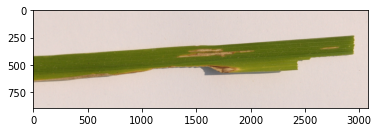

In [6]:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/My Drive/RiceLeafData/Bacterial leaf blight/DSC_0365.JPG')
plt.imshow(img)
plt.axis('on')
plt.show()

In [7]:
Data_x.class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [8]:
pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = training_datagen.flow_from_directory(
	path,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126,subset="training"
)

validation_generator = validation_datagen.flow_from_directory(
	path,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126,subset="validation"
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=200, steps_per_epoch=1, validation_data = validation_generator, verbose = 2, validation_steps=1)

model.save("model_rice_leaf.h5")